# Titanic Analysis With Python 

The aim of this project is using python to analyse a data set containing information on the Titanic and then communicating 

findings as well as I can using only Python and Matplotlib without the NumPy and Pandas libraries.

# Importing The DataSet 

In [ ]:
##Importing the csv file from location on storage into a python list

import unicodecsv

with open ('titanic_data.csv','rb') as f:   #Open the csv file as a readable binary attached to the variable f
    reader = unicodecsv.DictReader(f)       #Using the UNICODECSV library, read the file into a One time reader
    titanic_data = list(reader)             #Read the info from the reader as a list into the variable 'titanic_data'

In [61]:
titanic_data[0:2]           ##Checking on a slice of the data in the list 

[OrderedDict([('PassengerId', '1'),
              ('Survived', '0'),
              ('Pclass', '3'),
              ('Name', 'Braund, Mr. Owen Harris'),
              ('Sex', 'male'),
              ('Age', '22'),
              ('SibSp', '1'),
              ('Parch', '0'),
              ('Ticket', 'A/5 21171'),
              ('Fare', '7.25'),
              ('Cabin', ''),
              ('Embarked', 'S')]),
 OrderedDict([('PassengerId', '2'),
              ('Survived', '1'),
              ('Pclass', '1'),
              ('Name', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'),
              ('Sex', 'female'),
              ('Age', '38'),
              ('SibSp', '1'),
              ('Parch', '0'),
              ('Ticket', 'PC 17599'),
              ('Fare', '71.2833'),
              ('Cabin', 'C85'),
              ('Embarked', 'C')])]

# QUESTIONS, EXPECTATIONS AND PROPOSED ANALYSIS

Inspecting the data on Excel Spreadsheets, I have come up with quite a few intriguing questions I propose to answer.

These questions are:

A: Spotting survivability rates by age and sex

1) I'm interested in seeing how survival varied by age. I am also interested in calculating these totals by categories. Categories are within the age ranges of:
      - A child is rated as 12 years and below.
      - Men and women are rated as above 21.
      - Adolescents are between 12 and 21.
      - Males and Females are as designated by the data.
      - Elderly is an age class above years of age.

2) The survivors data totalled for the above categories as well as:
      - Total number of survivors         ----
      - Total number of male survivors       ----
      - Total number of female survivors       ----

3) The ages and the means for those same categories.
      - Mean age of passengers       ----
      - Mean age of survivors       ----
      - Mean age of male passengers        ----
      - Mean age of male survivors       ----
      - Mean age of female survivors       ----
      - Mean age of female passengers        ---- 
      - Mean age of female survivors       ----
      - Mean number of child and adolescents passengers 
      - Mean number of child and adolescents survivors 

---->Noted: I think a histogram/stacked bar plot might be best for displaying the above data (1-3).

B: Searching other factors that affecting survivability

4) Exploring the Relationships between factors that affect survivability:

      - Sex and survivability              (Sex is designated as M, F by the data)
      - Ticket Class and survivability     (Ticket class is divided into 1st, 2nd and 3rd Class)
      - Passenger Fare and survivability   
      - Age and survivability
      - Cabin number and survivability
      - Port of Embarkation and survivability  (Ports of Embarkation are C = Cherbourg, Q = Queenstown, S = Southampton)
     
---->Noted: I think a scatter plot might be best for examining the above data.

5) Also searching through these possible relationships might be interesting:
      
      Fare and Ticket Class and survivability on size
      Attempting investigating data for Families on the titanic.
      Age, Ticket Fare and no of siblings reported

---->Noted: I think a bubble plot might be best for examining the above data.

6) What price of ticket determines what class one is put into.

# CLEANING THE DATA

In [62]:
## Writing a function to check for columns with missing data in the function

def has_missing_data(data, field):
    empty = set()               
    for passenger in data:      ##Iterates through passenger data and checks for the fields to spot if empty
        check = passenger[field] 
        if check == '':
            empty.add(passenger['PassengerId']) #Returns a list of Passenger ID's with the missing fields
    return empty

print('Total Passengers present: ', len(titanic_data))
print('PassengerId missing fields: ', len(has_missing_data(titanic_data, 'PassengerId')))
print('Survived missing fields: ', len(has_missing_data(titanic_data, 'Survived')))
print('Pclass missing fields: ', len(has_missing_data(titanic_data, 'Pclass')))
print('Name missing fields: ', len(has_missing_data(titanic_data, 'Name')))
print('Sex missing fields: ', len(has_missing_data(titanic_data, 'Sex')))
print('Age missing fields: ', len(has_missing_data(titanic_data, 'Age')))
print('SibSp missing fields: ', len(has_missing_data(titanic_data, 'SibSp')))
print('Parch missing fields: ', len(has_missing_data(titanic_data, 'Parch')))
print('Ticket missing fields: ', len(has_missing_data(titanic_data, 'Ticket')))
print('Fare missing fields: ', len(has_missing_data(titanic_data, 'Fare')))
print('Cabin missing fields: ', len(has_missing_data(titanic_data, 'Cabin')))
print('Embarked missing fields: ', len(has_missing_data(titanic_data, 'Embarked')))

Total Passengers present:  891
PassengerId missing fields:  0
Survived missing fields:  0
Pclass missing fields:  0
Name missing fields:  0
Sex missing fields:  0
Age missing fields:  177
SibSp missing fields:  0
Parch missing fields:  0
Ticket missing fields:  0
Fare missing fields:  0
Cabin missing fields:  687
Embarked missing fields:  2


###### From the results: 
177 passengers are missing age information, 687 passengers are missing Cabin data and 2 passengers are missing Embarked Data

In [63]:
#Cleaning Data on the dataset of empty values from Age, Cabin and Embarked
##Write functions to convert data types


def parse_element(element):       ##Checks for empty strings and fills with none          
    if element == '':
        return None
    else:
        return element
    
def parse_age(age):       ##Checks for empty strings and fills with none          
    if age == '':
        return None 
    else:
        return float(age)     ##convert age to integers

        
for passenger in titanic_data:      #Converting data rows to convenient types and sorting empty data 
    passenger['Age'] = (parse_age(passenger['Age']))#Decision to use float over int was due to fractional ages in the dataset
    passenger['Cabin'] = (parse_element(passenger['Cabin']))
    passenger['Embarked'] = (parse_element(passenger['Embarked']))
    passenger['SibSp'] = int(passenger['SibSp'])   
    passenger['Parch'] = int(passenger['Parch'])
    passenger['Fare'] = float(passenger['Fare'])
    passenger['Sur'] = float(passenger['Fare'])


In [64]:
missing_embarked = has_missing_data(titanic_data, 'Embarked')
for passenger in titanic_data:
    if passenger['PassengerId'] in missing_embarked:
        print (passenger)

# Investigating The Data

### Investigating the First two Questions 

In [67]:
##GROUPING THE DATA BY ACCOUNT KEYS
%pylab inline

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from collections import defaultdict

##WRITING A FUNCTION TO GROUP DATA BY INPUT

def group_data(data, field):               #Takes in data and a field name with which to group the data
    grouped_data = defaultdict(list)    #Makes a default dictionary that outputs a list when 
    for passenger in data:
        key = passenger[field]          #sets the field as the dictionary key
        grouped_data[key].append(passenger) 
    return grouped_data


##WRITING A FUNCTION TO SUM UP GROUPED DATA

def sum_grouped_items(grouped_data, field):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0.0
        for data_point in data_points:
            if data_point[field] != None:
                total += data_point[field]
                summed_data[key] = total
    return summed_data


def sum_grouped_items(grouped_data, field):
    listed_data = []
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field]
        summed_data[key] = total
    return listed_data

##WRITING A FUNCTION TO ARRANGE A FIELD OF DATA INTO A LIST FROM UNGROUPED DATA
def list_data(data, field):
    listed = []
    for passenger in data:
        if passenger[field] != None:
            listed.append(passenger[field])
    return listed


def describe_data(data, bin_size):
    print ('Size: ', len(data))
    print ('Mean: ',np.mean(data))
    print ('Standard Deviation: ',np.std(data))
    print ('Median: ',np.median(data))
    print ('Minimum: ',np.min(data))
    print ('Maximum: ',np.max(data))
    plt.hist(data, bins=bin_size)

Populating the interactive namespace from numpy and matplotlib


In [68]:
##Grouping the passengers by ID

passengers_by_id = group_data(titanic_data, 'PassengerId')
passengers_by_id['1']

[OrderedDict([('PassengerId', '1'),
              ('Survived', '0'),
              ('Pclass', '3'),
              ('Name', 'Braund, Mr. Owen Harris'),
              ('Sex', 'male'),
              ('Age', 22.0),
              ('SibSp', 1),
              ('Parch', 0),
              ('Ticket', 'A/5 21171'),
              ('Fare', 7.25),
              ('Cabin', None),
              ('Embarked', 'S'),
              ('Sur', 7.25)])]

Size:  714
Mean:  29.6991176471
Standard Deviation:  14.5163211508
Median:  28.0
Minimum:  0.42
Maximum:  80.0


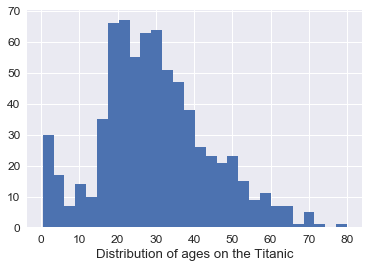

In [69]:
##TAKING THE AGES FROM THE TITANIC DATA BY AGE AND PLOTTING A HISTOGRAM

ages = list_data(titanic_data, 'Age')
        
sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)
plt.xlabel('Distribution of ages on the Titanic')
describe_data(ages,28)

The average age seemed to be about 29 with most passengers between 20 and 25.

The mean and median seem to be fairly positioned around the same area with a higher mean.

The oldest passenger was 80 and the youngest is 5 months old.

## Investigating Survivor Data vs Non Survivor Data

In [70]:
#Splitting off the data for survivors and non_survivors from the titanic dataset

passengers_by_survivorship = group_data(titanic_data, 'Survived')
survivor_data = passengers_by_survivorship['1']
non_survivor_data = passengers_by_survivorship['0']

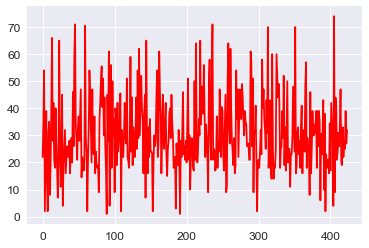

In [71]:
plot(non_survivor_age_list, color='red')

Size:  290
Mean:  28.3436896552
Standard Deviation:  14.9251522203
Median:  28.0
Minimum:  0.42
Maximum:  80.0


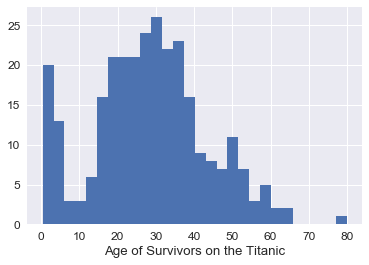

In [72]:
##SURVIVOR DATA BY AGE

sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)
plt.xlabel('Age of Survivors on the Titanic')
survivor_age_list = list_data(survivor_data,'Age')
describe_data(survivor_age_list, 28)

We can easily see the data on survivors:

About 290 people survived the sinking of the titanic with 424 people dead.

The average age of survivors seemed to be about 28 with most passengers between 30 and 35.
For non-survivors however, the mean age seemed to be about 30.

While survivors and non-survivors seemed to have the most daeths and surviors between 20 and 30, non-survivors seemed to peak on the side of early twenties while survivors peaked on the othe side. Of particular note is infant mortality with about a third of children between the ages of 0 and 3 being saved.

The oldest passenger was 80 and the youngest is 5 months old.

Size:  197
Mean:  28.847715736
Standard Deviation:  14.1390495865
Median:  28.0
Minimum:  0.75
Maximum:  63.0


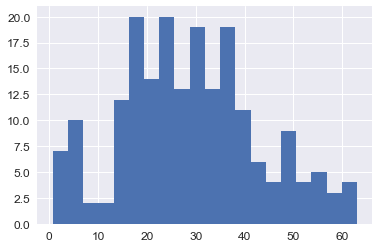

In [73]:
### Separating survivors by sex

male_survivors = []
female_survivors = []
for passenger in survivor_data:
    if passenger['Sex'] == 'male':
        male_survivors.append(passenger)
    elif passenger['Sex'] == 'female':
        female_survivors.append(passenger)

describe_data(list_data(female_survivors, 'Age'),20)

Size:  424
Mean:  30.6261792453
Standard Deviation:  14.1553876178
Median:  28.0
Minimum:  1.0
Maximum:  74.0


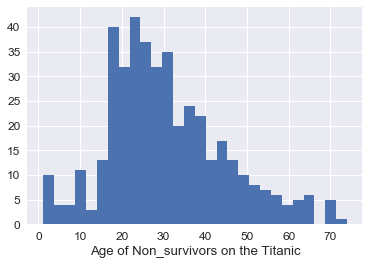

In [74]:
##NON_SURVIVOR DATA BY AGE

sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)
plt.xlabel('Age of Non_survivors on the Titanic')
non_survivor_age_list = list_data(non_survivor_data,'Age')
describe_data(non_survivor_age_list, 28)

Size:  197
Mean:  28.847715736
Standard Deviation:  14.1390495865
Median:  28.0
Minimum:  0.75
Maximum:  63.0


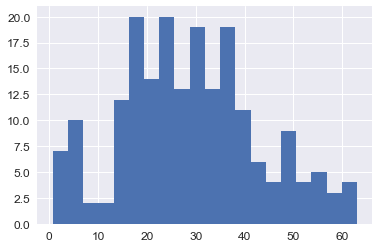

In [75]:
##DESCRPTION OF FEMALE SURVIVORS

describe_data(list_data(female_survivors, 'Age'),20)

There are 93 male passengers compared to 197 female passengers

Size:  93
Mean:  27.2760215054
Standard Deviation:  16.4158276718
Median:  28.0
Minimum:  0.42
Maximum:  80.0


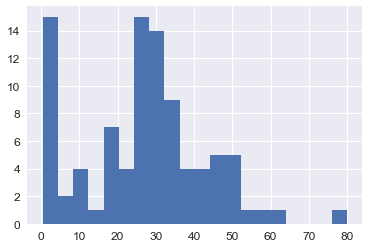

In [76]:
##DESCRPTION OF MALE SURVIVORS

describe_data(list_data(male_survivors, 'Age'),20)

<Container object of 8 artists>

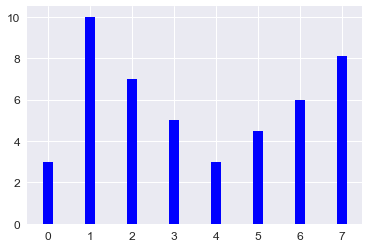

In [77]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 0.25
plt.bar(x, y, width, color="blue")

### Categorizing Data Into Groups

In [78]:
##Grouping the passengers by age

passengers_by_age = group_data(titanic_data, 'Age')
passengers_by_age.keys()

dict_keys([22.0, 38.0, 26.0, 35.0, None, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0, 45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0, 24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0, 36.5, 51.0, 55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5, 20.5, 62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0, 13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5, 0.42, 34.5, 74.0])

## Exploring other relationships that affect Survivability

AGE AND FARE BY SEX

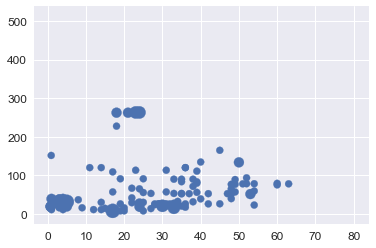

In [113]:
##RELATIONSHIP BETWEEN FARE AND AGE IN SURVIVORS

def object_list(data, field1, field2, check):
    survivor_list=[]
    for person in data:
        if person[field1] != None:
            survivor_list.append(float(person[field2])) #fare and age
    return survivor_list


new_survivor=[]
survivor_fare = object_list(survivor_data, 'Age', 'Fare', 0)
survivor_siblings = object_list(survivor_data, 'Age', 'SibSp', 0)

for survivor in survivor_siblings:
    new_survivor.append(survivor * 50)
    
scatter(survivor_age_list,survivor_fare, s= new_survivor)

Size:  342
Mean:  48.3954076023
Standard Deviation:  66.4995628092
Median:  26.0
Minimum:  0.0
Maximum:  512.3292


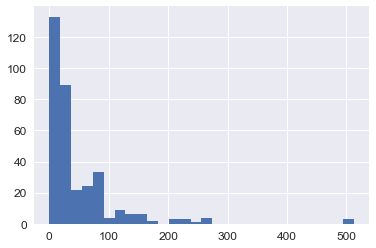

In [114]:
survivor_fare_list = list_data(survivor_data,'Fare')
describe_data(survivor_fare_list, 28)

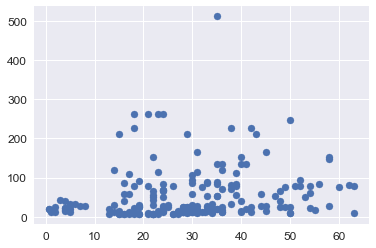

In [94]:
##RELATIONSHIP BETWEEN FARE AND AGE IN WOMEN

female_survivor_fare = object_list(female_survivors, 'Age', 'Fare', None)
scatter(list_data(female_survivors, 'Age'),female_survivor_fare)


In [ ]:
passengers_by_name = group_data(titanic_data, 'Survived')
